<a href="https://colab.research.google.com/github/najnin26/Data-Mining/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.shape

(48, 5)

In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [7]:
df.isnull().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence(%),0
Petrol_Consumption,0


In [8]:
df.isnull().any()

,0
Petrol_tax,False
Average_income,False
Paved_Highways,False
Population_Driver_licence(%),False
Petrol_Consumption,False


In [9]:
df.dtypes

,0
Petrol_tax,float64
Average_income,int64
Paved_Highways,int64
Population_Driver_licence(%),float64
Petrol_Consumption,int64


In [10]:
df.isnull().sum().sum()

0

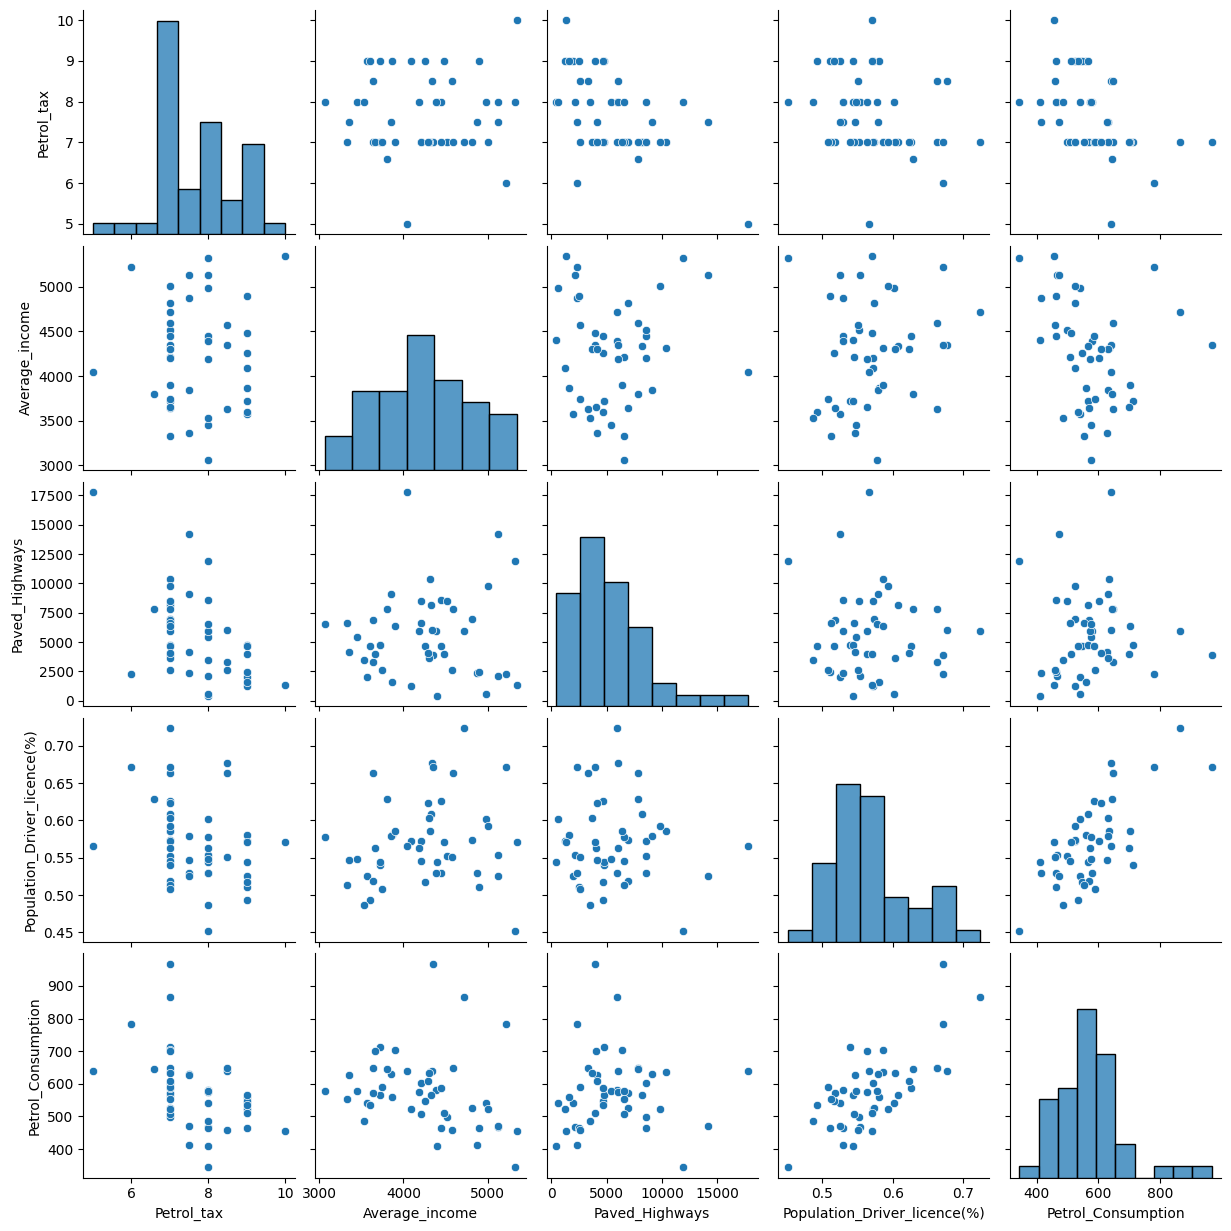

In [11]:
sns.pairplot(df)

In [12]:
X=df.drop('Petrol_Consumption',axis=1)

In [13]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [14]:
y=df.iloc[:,-1]

In [15]:
y

,Petrol_Consumption
0,541
1,524
2,561
3,414
4,410
5,457
6,344
7,467
8,464
9,498


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38, 4) (10, 4) (38,) (10,)


In [18]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

In [21]:
lr.intercept_

361.45087906653225

In [22]:
pred=lr.predict(X_test)

In [23]:
new=pd.DataFrame({"Actual":y_test,"Predicted":pred})

In [24]:
new

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [25]:
X.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

<Axes: >

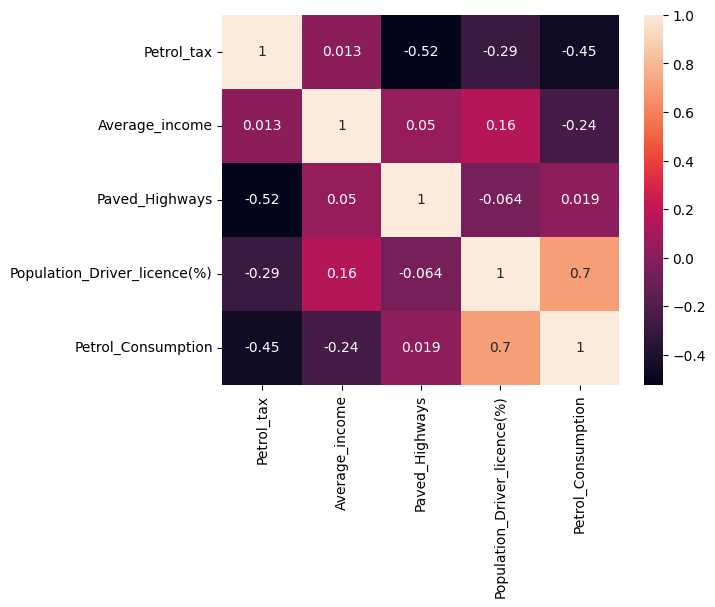

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
from sklearn import metrics

metrics.mean_absolute_error(y_test,pred)

53.468541282916625

In [28]:
metrics.mean_squared_error(y_test,pred)

4083.2558717453767

In [29]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

63.90035893283681